In [1]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D # for 3D plots

In [2]:
df=pd.read_csv('Datos_SenecaféAlpes.csv', sep=';', encoding = "ISO-8859-1") 

In [3]:
df.shape 

(14291, 19)

In [4]:
df.head() 

,ï»¿ID,Area,Perimetro,LongitudEjeMayor,LongitudEjeMenor,RelacionAspecto,Excentricidad,AreaConvexa,DiametroEquivalente,Medida,Solidez,Redondez,Compacidad,FactorForma1,FactorForma2,FactorForma3,FactorForma4,DefectoVisible,MÃ©todoSecado
0,G006149,50836,923618.0,358.515147,181.388899,alargado,NaN,NaN,254.413847,0.804762,0.983840,0.748853,0.709632,0.007052,0.001103,0.503578,0.995321,Normal,Lavado
1,G007234,62764,1003767.0,409.207082,198.330199,Alargado,NaN,64158.0,282.689948,0.703995,0.978272,0.782807,0.690824,0.006520,0.000916,0.477237,0.984666,NaN,Natural
2,G007054,59965,994266.0,389.088529,197.967275,Alargado,0.860886,60910.0,276.314692,0.661581,0.984485,0.762259,0.710159,0.006489,0.001018,0.504326,0.991211,Normal,Natural
3,G006619,55035,917.6,379.346822,185.390577,Alargado,0.872446,55591.0,NaN,0.799695,0.989998,0.821376,0.697811,0.006893,0.001008,0.486941,0.996380,Normal,Lavado
4,G013353,39324,737773.0,262.520242,191.176858,Alargado,0.685326,39758.0,223.760747,0.775392,0.989084,0.907867,0.852356,0.006676,0.002174,0.726511,0.997630,Normal,Lavado


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14291 entries, 0 to 14290
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ï»¿ID                14291 non-null  object 
 1   Area                 14291 non-null  int64  
 2   Perimetro            13054 non-null  float64
 3   LongitudEjeMayor     13890 non-null  float64
 4   LongitudEjeMenor     14291 non-null  float64
 5   RelacionAspecto      13825 non-null  object 
 6   Excentricidad        13687 non-null  float64
 7   AreaConvexa          12868 non-null  float64
 8   DiametroEquivalente  12368 non-null  float64
 9   Medida               14291 non-null  float64
 10  Solidez              11985 non-null  float64
 11  Redondez             12228 non-null  float64
 12  Compacidad           13641 non-null  float64
 13  FactorForma1         13172 non-null  float64
 14  FactorForma2         13185 non-null  float64
 15  FactorForma3         13813 non-null 

In [6]:
df.describe()

,Area,Perimetro,LongitudEjeMayor,LongitudEjeMenor,Excentricidad,AreaConvexa,DiametroEquivalente,Medida,Solidez,Redondez,Compacidad,FactorForma1,FactorForma2,FactorForma3,FactorForma4
count,14291.000000,1.305400e+04,13890.000000,14291.000000,13687.000000,12868.000000,12368.000000,14291.000000,11985.000000,12228.000000,13641.000000,13172.000000,13185.000000,13813.000000,13132.000000
mean,53055.408999,7.729870e+05,319.985592,202.178613,0.749977,53575.397809,253.001741,0.749844,0.986774,0.873080,0.799242,0.006560,0.001712,0.643183,0.994292
std,29396.080372,3.266493e+05,86.378452,45.494541,0.099438,29566.387814,60.542330,0.050774,0.025947,0.063237,0.067643,0.001164,0.000601,0.100857,0.039081
min,-62716.000000,-1.012143e+06,-421.444657,-200.838672,-0.835004,-78423.000000,-448.402605,-0.798706,-0.989042,-0.896861,-0.843901,-0.007982,-0.002673,-0.683269,-0.998527
25%,36338.000000,6.768608e+05,253.319858,175.881052,0.715144,36720.000000,215.302463,0.718767,0.985597,0.832824,0.762127,0.005903,0.001151,0.581047,0.993663
50%,44660.000000,7.720345e+05,296.682345,192.437870,0.764392,45107.500000,238.579492,0.760232,0.988279,0.883353,0.800994,0.006645,0.001691,0.641648,0.996377
75%,61311.000000,9.554098e+05,376.548109,216.847844,0.810441,62109.250000,279.672481,0.786942,0.989991,0.916803,0.834405,0.007273,0.002169,0.696366,0.997889
max,254616.000000,1.921685e+06,738.860154,460.198497,0.911423,251082.000000,569.374358,0.866195,0.994378,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


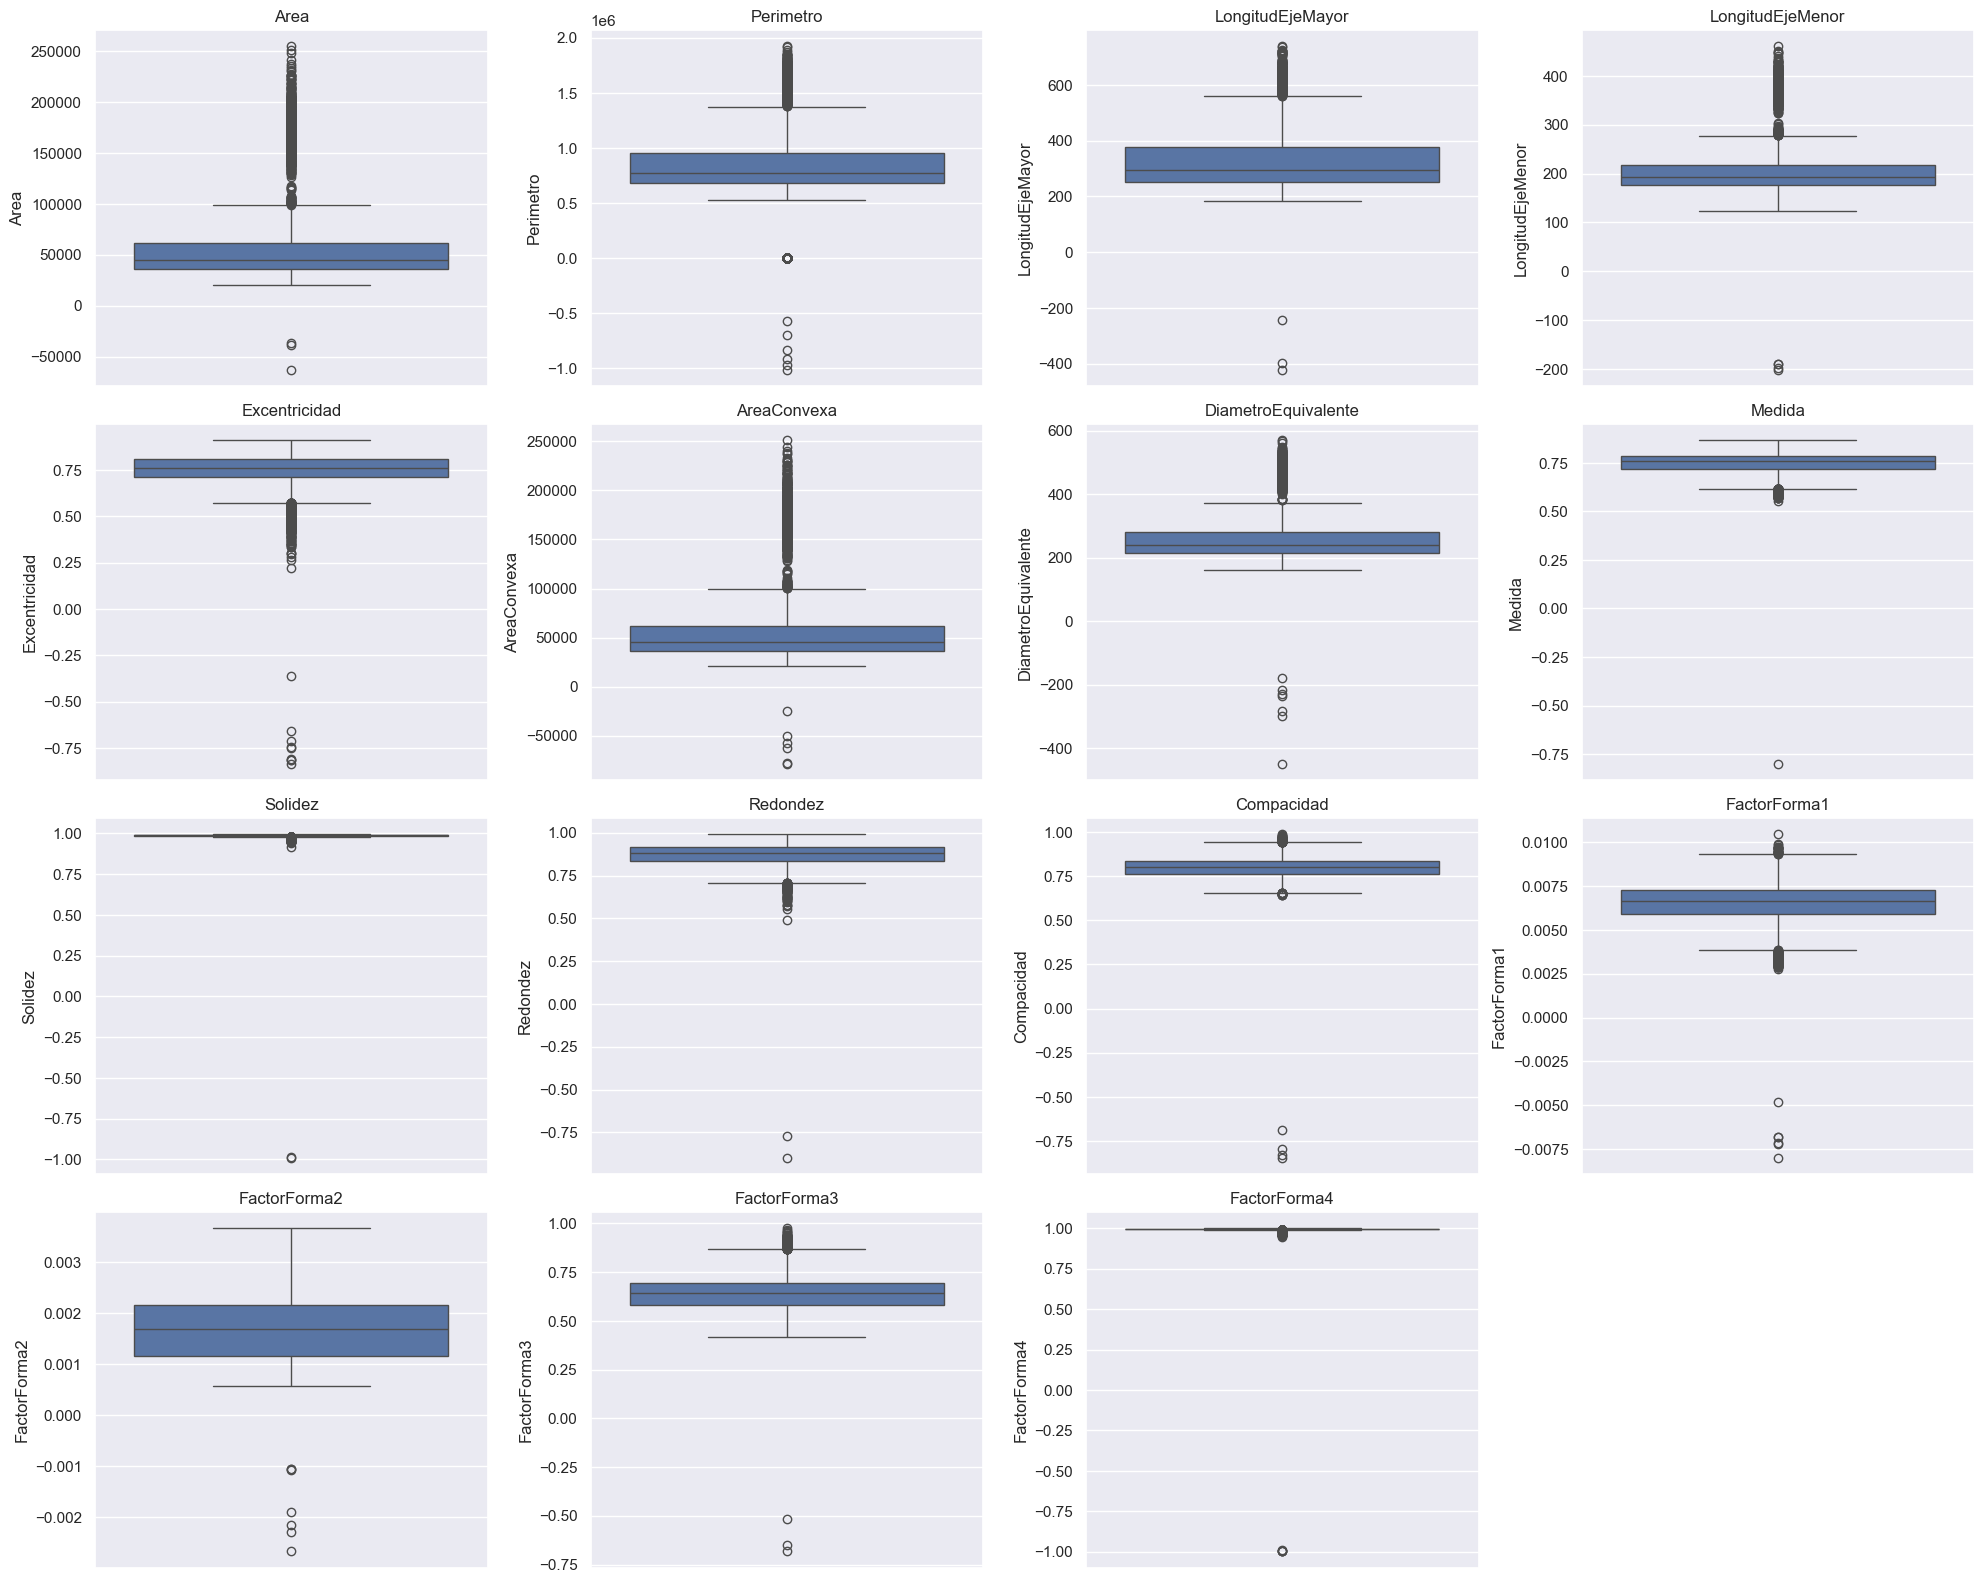

In [7]:
num_cols = df.select_dtypes(include="number").columns  

n_cols = 4  # puedes ajustar este valor
n_rows = int(len(num_cols) / n_cols) + 1  

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 4*n_rows))

# "axes" puede ser 2D, lo aplanamos
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(col)

# Elimina ejes vacíos si sobran
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [8]:
# Explorar las variables que no son numéricas
name_cols_non_number = df.select_dtypes(include = ['object']).columns
name_cols_non_number

Index(['ï»¿ID', 'RelacionAspecto', 'DefectoVisible', 'MÃ©todoSecado'], dtype='object')

In [9]:
df[name_cols_non_number].describe()

,ï»¿ID,RelacionAspecto,DefectoVisible,MÃ©todoSecado
count,14291,13825,11356,13704
unique,13611,4,2,6
top,G006149,Alargado,Normal,Lavado
freq,2,12047,9096,6260


In [10]:
df.RelacionAspecto.value_counts() 

RelacionAspecto
Alargado      12047
Redondeado     1739
alargado         29
redondeado       10
Name: count, dtype: int64

In [11]:
df['RelacionAspecto'] = df['RelacionAspecto'].replace('Alargado', 'alargado')
df['RelacionAspecto'] = df['RelacionAspecto'].replace('Redondeado', 'redondeado')


In [12]:
df.RelacionAspecto.value_counts()

RelacionAspecto
alargado      12076
redondeado     1749
Name: count, dtype: int64

In [11]:
df.DefectoVisible.value_counts() 

DefectoVisible
Normal    9096
normal    2260
Name: count, dtype: int64

In [17]:
if 'DefectoVisible' in df.columns:
    df = df.drop('DefectoVisible', axis=1)


In [16]:
df["MÃ©todoSecado"].value_counts()

MÃ©todoSecado
Lavado     6260
Natural    4639
lavado     1552
natural    1176
Honey        64
honey        13
Name: count, dtype: int64

In [14]:
df['MÃ©todoSecado'] = df['MÃ©todoSecado'].replace('Lavado', 'lavado')
df['MÃ©todoSecado'] = df['MÃ©todoSecado'].replace('Natural', 'natural')
df['MÃ©todoSecado'] = df['MÃ©todoSecado'].replace('Honey', 'honey')


In [15]:
df["MÃ©todoSecado"].value_counts()

MÃ©todoSecado
lavado     7812
natural    5815
honey        77
Name: count, dtype: int64

In [19]:
((df.isnull().sum()/df.shape[0])).sort_values(ascending=False)

Solidez                0.161360
Redondez               0.144357
DiametroEquivalente    0.134560
AreaConvexa            0.099573
Perimetro              0.086558
FactorForma4           0.081100
FactorForma1           0.078301
FactorForma2           0.077391
Compacidad             0.045483
Excentricidad          0.042264
MÃ©todoSecado          0.041075
FactorForma3           0.033448
RelacionAspecto        0.032608
LongitudEjeMayor       0.028060
ï»¿ID                  0.000000
Area                   0.000000
LongitudEjeMenor       0.000000
Medida                 0.000000
dtype: float64

In [20]:
df.duplicated(keep = False).sum() 

1340

In [24]:
negativos = df['Area'] < 0
cantidad_negativos = negativos.sum()
print(f'Cantidad de valores negativos en la columna Area: {cantidad_negativos}')

Cantidad de valores negativos en la columna Area: 3


In [25]:
negativos = df['Perimetro'] < 0
cantidad_negativos = negativos.sum()
print(f'Cantidad de valores negativos en la columna Perimetro: {cantidad_negativos}')

Cantidad de valores negativos en la columna Perimetro: 6


In [26]:
negativos = df['LongitudEjeMayor'] < 0
cantidad_negativos = negativos.sum()
print(f'Cantidad de valores negativos en la columna LongitudEjeMayor: {cantidad_negativos}')

Cantidad de valores negativos en la columna LongitudEjeMayor: 3


In [23]:
negativos = df['Excentricidad'] < 0
cantidad_negativos = negativos.sum()
print(f'Cantidad de valores negativos en la columna Excentricidad: {cantidad_negativos}')
mas1= df['Excentricidad'] > 1
cantidad_mas1 = mas1.sum()
print(f'Cantidad de valores mayores a 1 en la columna Excentricidad: {cantidad_mas1}')


Cantidad de valores negativos en la columna Excentricidad: 9
Cantidad de valores mayores a 1 en la columna Excentricidad: 0
